<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 2*

# 📝 Assignment

---


# Vectorization of Texts

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다. 이 데이터를 이용해 다음 체크포인트를 진행해 보세요!

In [4]:
!python -m spacy download en_core_web_lg
!pip install -U spacy
!pip install --upgrade spacy

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Requirement already up-to-date: spacy in c:\users\user\anaconda3\lib\site-packages (3.0.5)


Requirement already up-to-date: spacy in c:\users\user\anaconda3\lib\site-packages (3.0.5)


In [16]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from spacy.tokenizer import Tokenizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [14]:
df = pd.read_csv(r'C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section4\N422_vectorization_of_texts\Data_Scientist.csv', index_col = 'Unnamed: 0')
print(df.shape)
print("--------------")
print(df.dtypes)
print("--------------")
print(df.isnull().sum())

(1300, 4)
--------------
title          object
company        object
description    object
url            object
dtype: object
--------------
title          0
company        0
description    0
url            0
dtype: int64


In [13]:
df.head(2)

,title,company,description,url
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...


In [20]:
#0, 1이 중복이 되어서 중복값을 확인
df.duplicated().sum()

542

In [21]:
# 대략 절반 정도가 중복된 것으로 확인이 된다.
# 이런경우 데이터를 다시 가져오는 것을 확인해보아야 하지만 본과제는 그냥 중복을 제거하고 진행토록 하겠다. 

df = df.drop_duplicates().reset_index(drop=True)

### 1) Spacy를 사용해 description 칼럼 문서들을 토큰화 합니다.

- 문항 1) 토큰화에 사용한 spacy 언어모델(예.en_XXXXX)을 입력하시오.

In [18]:
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

print(nlp)
print(tokenizer)

In [22]:
# 데이터 전처리 
def token_preprocessing(text):
    text = str(text).lower()
    regex = r'[^a-zA-Z0-9 ]'
    text = re.sub(regex, '', text)
    return text

df['description'] = df['description'].apply(token_preprocessing)
df[['description']].head()

,description
0,job detailsdescriptionessential duties and res...
1,as a team member in the finance and internal a...
2,overviewamerican credit acceptance seeks a hig...
3,jp morgans corporate investment bank cib is a...
4,at vystar we offer competitive pay an excellen...


In [34]:
tokens = []
for doc in nlp.pipe(df['description']):
    doc_tokens = [token.lemma_ for token in doc if (token.is_stop == False) & (token.is_punct == False) & (token.is_alpha)]
    tokens.append(doc_tokens)
    
df['tokens'] = tokens
df.head()

,title,company,description,url,tokens
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,job detailsdescriptionessential duties and res...,https://www.indeed.com/viewjob?jk=4e172dc068a7...,"[job, detailsdescriptionessential, duty, respo..."
1,"Specialist, Data Science",Nationwide,as a team member in the finance and internal a...,https://www.indeed.com/viewjob?jk=a06d07dec837...,"[team, member, finance, internal, audit, depar..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,overviewamerican credit acceptance seeks a hig...,https://www.indeed.com/viewjob?jk=422a9c487215...,"[overviewamerican, credit, acceptance, seek, h..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",jp morgans corporate investment bank cib is a...,https://www.indeed.com/viewjob?jk=4bff8a12d5ce...,"[jp, morgans, corporate, investment, bank, cib..."
4,Data Scientist,VyStar Credit Union,at vystar we offer competitive pay an excellen...,https://www.indeed.com/viewjob?jk=90f7a420e89b...,"[vystar, offer, competitive, pay, excellent, b..."


### 2) CountVectorizer를 이용해 각 문서들을 벡터화 합니다

- 문항 2) CountVectorizer를 사용하기위한 코드에서 밑줄에 들어야할 method를 입력하시오.

```
vect = CountVectorizer(stop_words='english',
                       tokenizer = tokenize,
                       max_features=30000)

dtm_vect = vect.____### Your Code Here####_____(df['description'])

```

In [26]:
# spacy tokenizer 함수
def tokenize(document):
    
    doc = nlp(document)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [29]:
import warnings 
warnings.filterwarnings('ignore')

In [30]:
# CountVectorizer 객체 생성
vect = CountVectorizer(stop_words='english',
                       tokenizer = tokenize,
                       max_features=30000)

# 학습 및 벡터 변환
dtm_vect = vect.fit_transform(df['description'])

# 데이터 프레임화
dtm = pd.DataFrame(dtm_vect.todense(), columns=vect.get_feature_names())
dtm.head()

,aa,aaai,aaeeo,aaeoohsuedu,aav,aaveteransdisabled,ab,abbott,abbottglobal,abbottnew,...,zoo,zoom,zoomin,zoompossible,zoonotic,zr,zsh,zulily,zurichnacomencareer,zweig
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3) 가장 많은 빈도로 나타나는 단어들을 시각화 합니다.

- 문항 3) 시각화한 결과 Top 5개의 단어를 입력하시오.

In [31]:
from collections import Counter

def word_count(docs):
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [35]:
wc= word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
154,datum,722,5024,1.0,0.021704,0.021704,0.952507
83,work,679,2465,2.0,0.010649,0.032353,0.895778
186,experience,649,2155,3.0,0.009310,0.041663,0.856201
50,team,623,2055,4.0,0.008878,0.050541,0.821900
392,business,537,2052,5.0,0.008865,0.059406,0.708443


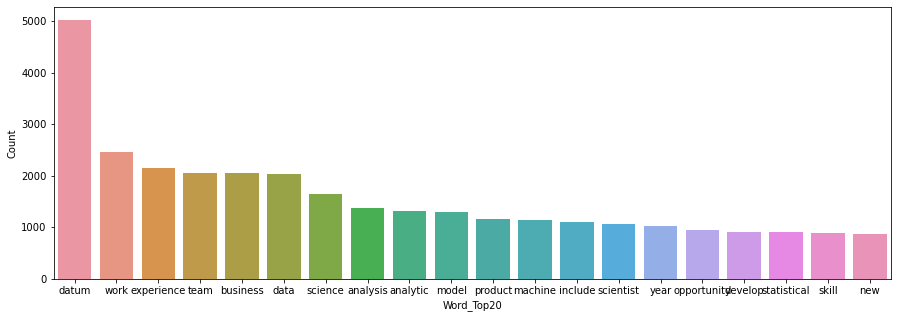

In [40]:
import seaborn as sns

wc_top20 = wc[wc['rank'] <= 20]
plt.figure(figsize=(15,5))
sns.barplot(x = wc_top20['word'], y = wc_top20['count'])
plt.xlabel('Word_Top20');
plt.ylabel('Count');

In [42]:
!pip install squarify

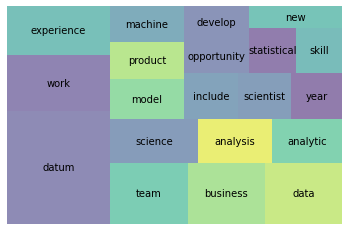

In [43]:
import squarify
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 4) tfidfVectorizer를 이용해 각 문서들을 벡터화 한 후, K-NN 모델을 만들고 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- 문항 4) 88번 index를 기준으로 5개의 가장 가까운 후보들을 입력하시오

In [44]:
# TF_IDF Vectorize
tfidf = TfidfVectorizer(stop_words='english'
                       , tokenizer = tokenize
                       , ngram_range=(1,2)
                       , max_df= .7
                       , min_df=2
                       , max_features= 30000)

# 학습 및 벡터 변환
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm2 = pd.DataFrame(dtm_tfidf.todense(), columns = tfidf.get_feature_names())
dtm2

,aa,aa mfvetdisability,aa policy,aav,aav capsid,aav gene,ab,ab experiment,ab test,ab testing,...,youyou,youyoure,yr,yrs,zeppelin,zero,zero waste,zillow,zillow group,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
754,0.0,0.0,0.0,0.0,0.0,0.0,0.034630,0.0,0.000000,0.041405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,0.0,0.0,0.0,0.0,0.0,0.0,0.060824,0.0,0.040975,0.036362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
distance_matrix = cosine_similarity(dtm2)
distance_df = pd.DataFrame(distance_matrix)
distance_df

,0,1,2,3,4,5,6,7,8,9,...,748,749,750,751,752,753,754,755,756,757
0,1.000000,0.061597,0.054948,0.084430,0.074099,0.029727,0.027819,0.029998,0.075405,0.075483,...,0.040692,0.052696,0.044197,0.037379,0.064380,0.002075,0.043430,0.049945,0.033616,0.028388
1,0.061597,1.000000,0.098440,0.091412,0.166897,0.029654,0.081144,0.093731,0.116998,0.072713,...,0.080940,0.070647,0.088879,0.074248,0.133183,0.017947,0.087575,0.094616,0.087167,0.048647
2,0.054948,0.098440,1.000000,0.091955,0.112252,0.039048,0.065565,0.051598,0.100996,0.060631,...,0.070552,0.066109,0.066357,0.067008,0.089240,0.014697,0.058354,0.075251,0.088015,0.043947
3,0.084430,0.091412,0.091955,1.000000,0.085447,0.050260,0.055785,0.078647,0.103732,0.071497,...,0.063363,0.075178,0.054988,0.086415,0.088237,0.026525,0.087998,0.092233,0.087568,0.065781
4,0.074099,0.166897,0.112252,0.085447,1.000000,0.050025,0.074838,0.077209,0.169680,0.086575,...,0.092355,0.068001,0.095848,0.066476,0.165531,0.012643,0.068076,0.074757,0.068689,0.041991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0.002075,0.017947,0.014697,0.026525,0.012643,0.002232,0.020780,0.020060,0.053663,0.001142,...,0.031653,0.033145,0.005588,0.030929,0.016625,1.000000,0.030435,0.020593,0.046726,0.010436
754,0.043430,0.087575,0.058354,0.087998,0.068076,0.082082,0.061280,0.112323,0.073626,0.033924,...,0.092226,0.068065,0.058261,0.045941,0.060912,0.030435,1.000000,0.050304,0.080320,0.055262
755,0.049945,0.094616,0.075251,0.092233,0.074757,0.081265,0.107487,0.070586,0.059873,0.046290,...,0.044645,0.103012,0.063188,0.094341,0.080043,0.020593,0.050304,1.000000,0.083122,0.066454
756,0.033616,0.087167,0.088015,0.087568,0.068689,0.038500,0.060963,0.057471,0.094923,0.032502,...,0.049803,0.083534,0.041901,0.068188,0.076781,0.046726,0.080320,0.083122,1.000000,0.046322


In [46]:
distance_df[88].sort_values(ascending = False)[:6]

88     1.000000
40     0.350239
121    0.127419
178    0.117555
68     0.111428
675    0.104509
Name: 88, dtype: float64

In [47]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
nn.fit(dtm)


nn.kneighbors([dtm.iloc[88].values])

(array([[ 0.        , 22.75961335, 22.97825059, 23.06512519, 23.10844002,
         23.17326045]]),
 array([[ 88, 291, 299, 210, 350, 266]], dtype=int64))

In [48]:
print(df.iloc[88].values[2])
print('-'*138)
print(df.iloc[291].values[2])

as a data engineer you will build a solid data foundation that powers the entire spectrum from business intelligence to artificial intelligence youll be critical to helping us in our transition from batch to realtime onetoone to manytomany connections centrally managed infrastructure to selfservice tools that allow easy experimentation and from manual to automated processesthis role will work closely with the data science and ai team and will focus on the enablement and acceleration of new and existing workflows we need someone who will bring a thoughtful perspective empathy creativity and a positive attitude to solve problems at scale this role is ideal for someone looking to extend software engineering skills into the field of machine learning and artificial intelligenceresponsibilities establish scalable efficient automated processes for data analyses model development validation and implementation work closely with data scientists and analysts to create and deploy new features writ

### 5) LSA방법을 사용하여 문제를 해결해보시오. 

- 문항 5) ...에 넣어서 사용했던 3가지 모델을 입력하세요. 
``` 
vect = ...
svd = ...
clf = ...
pipe = Pipeline([
    ('vect', vect)
    , ('svd', svd)
    , ('clf', rfc)
])
```


In [50]:
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [51]:
vect = CountVectorizer(stop_words='english',
                      ngram_range=(1,2),
                      min_df=2,
                      max_df=0.7,
                      max_features=30000)

svd = TruncatedSVD(algorithm='randomized',
                  n_iter=5,
                  random_state=2)

rfc =RandomForestClassifier(n_estimators=500, random_state=2)

params = {'svd__n_components' : stats.randint(2, 3)}

pipe = Pipeline([
    ('vect', vect)
    , ('svd', svd)
    , ('clf', rfc)
])

X_train = df[['company','description']]
y_train = df[['title']]

In [65]:
# random_search = RandomizedSearchCV(pipe, params, cv=3, n_iter=5, n_jobs=-1, verbose=1)
# random_search.fit(X_train, y_train)

## 도전과제

### 1) 다음의 데이터 셋을 이용하여 파이프라인을 제작하여  수행해 보시오. 

```
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/whisky/train.csv')
```

- 데이터 불러오기
- 카테고리별 데이터 확인
- 파이프라인 구성
- 하이퍼 파라미터 설정
- 정답률 70% 이상을 달성


In [57]:
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/whisky/train.csv')
print(df.shape)
print("--------------")
print(df.dtypes)
print("--------------")
print(df.isnull().sum())
train.head()

(758, 5)
--------------
title          object
company        object
description    object
url            object
tokens         object
dtype: object
--------------
title          0
company        0
description    0
url            0
tokens         0
dtype: int64


,id,price,description,rating
0,4160,70,This undergoes secondary maturation in heavily...,1
1,4086,63.00,Maturation for this 21 year old bottling of Bl...,1
2,944,105,"Aged in American oak, Pedro Ximénez, and oloro...",1
3,2351,62.00,"Bottled for this auspicious occasion, this is ...",1
4,3425,35,A platform of caramel sweetness comes draped i...,0


In [58]:
# 결측치 처리 
train = train.dropna()
train.isnull().sum()

id             0
price          0
description    0
rating         0
dtype: int64

In [ ]:
# Target 값 확인
print(train['rating'].sort_values().unique())
sns.countplot(x=train['rating']).set_title('Target value distribution confirmation');

In [ ]:
target = train['rating']
train = train['description']
print(train.shape, target.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=.2, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [60]:
vect = CountVectorizer(stop_words='english',
                      ngram_range=(1,2),
                      min_df=2,
                      max_df=0.7,
                      max_features=30000)

svd = TruncatedSVD(algorithm='randomized',
                  n_iter=5,
                  random_state=2)

rfc =RandomForestClassifier(n_estimators=500, random_state=2)

In [62]:
pipe = Pipeline([
    ('vect', vect)
    , ('svd', svd)
    , ('clf', rfc)
])

params = {'svd__n_components' : stats.randint(2, 3)}

### 2) Spacy 임베딩을 사용해서 기본과제 - 4번을 수행하고 결과를 비교하시오.